In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv("train 2.csv")
test = pd.read_csv("test_Vges7qu.csv")

In [3]:
for col in ["Product_Category_2", "Product_Category_3"]:
    train[col] = train[col].fillna(-1)
    test[col] = test[col].fillna(-1)

In [4]:
for col in ["Gender", "Age", "City_Category", "Stay_In_Current_City_Years"]:
    combined = pd.concat([train[col], test[col]], axis=0)
    mapping = {val: idx for idx, val in enumerate(combined.unique())}
    train[col] = train[col].map(mapping)
    test[col] = test[col].map(mapping)

In [5]:
train["User_ID_freq"] = train["User_ID"].map(train["User_ID"].value_counts())
test["User_ID_freq"] = test["User_ID"].map(train["User_ID"].value_counts()).fillna(0)

In [6]:
train["Product_ID_freq"] = train["Product_ID"].map(train["Product_ID"].value_counts())
test["Product_ID_freq"] = test["Product_ID"].map(train["Product_ID"].value_counts()).fillna(0)

In [8]:
features = [
    "Gender", "Age", "Occupation", "City_Category",
    "Stay_In_Current_City_Years", "Marital_Status",
    "Product_Category_1", "Product_Category_2", "Product_Category_3",
    "User_ID_freq", "Product_ID_freq"
]
X = train[features]
y = train["Purchase"]
X_test_final = test[features]

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print("Validation RMSE:", rmse)

Validation RMSE: 4502.824523256809


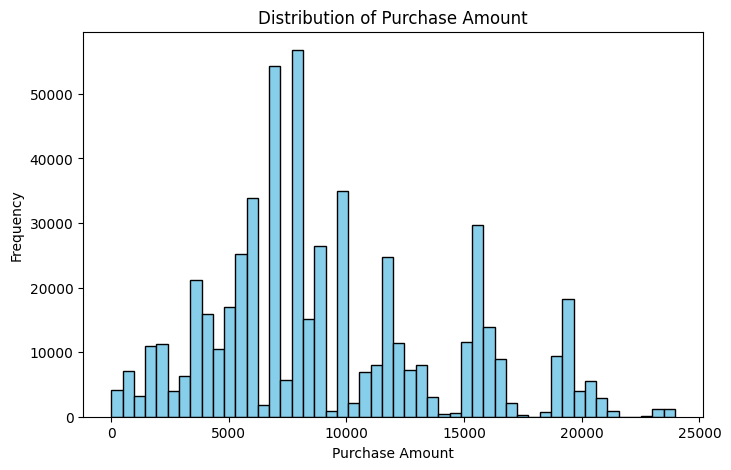

In [12]:
plt.figure(figsize=(8,5))
plt.hist(train["Purchase"], bins=50, color="skyblue", edgecolor="black")
plt.title("Distribution of Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Frequency")
plt.show()

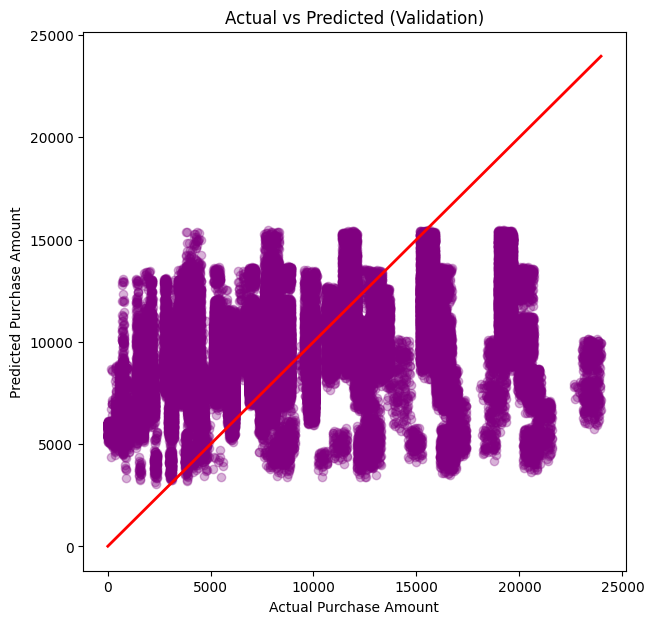

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(y_valid, y_pred, alpha=0.3, color="purple")
plt.xlabel("Actual Purchase Amount")
plt.ylabel("Predicted Purchase Amount")
plt.title("Actual vs Predicted (Validation)")
plt.plot([y_valid.min(), y_valid.max()],
         [y_valid.min(), y_valid.max()],
         color="red", linewidth=2)  # Reference line
plt.show()

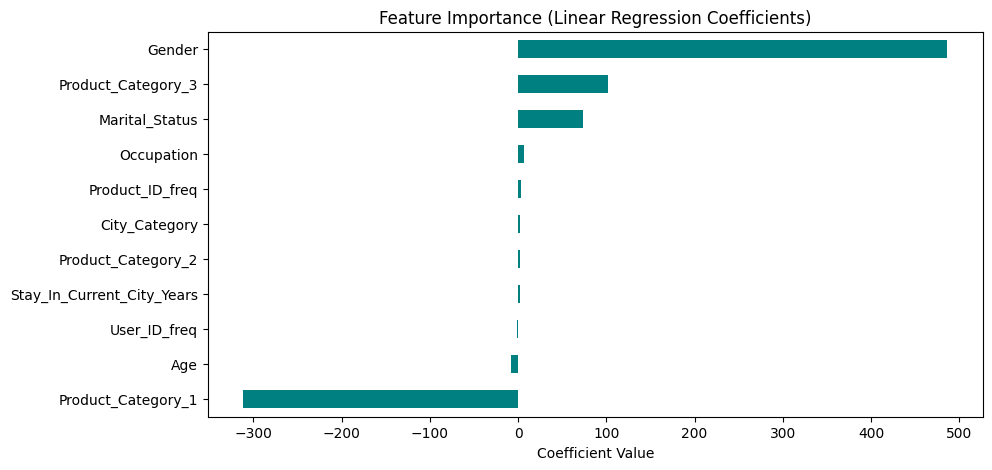

In [14]:
coef = pd.Series(model.coef_, index=features)
plt.figure(figsize=(10,5))
coef.sort_values().plot(kind="barh", color="teal")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()

In [15]:
model.fit(X, y)
test["Purchase"] = model.predict(X_test_final)

In [16]:
submission = test[["User_ID", "Product_ID", "Purchase"]]
submission.to_csv("submission.csv", index=False)
print("submission.csv file created!")

submission.csv file created!


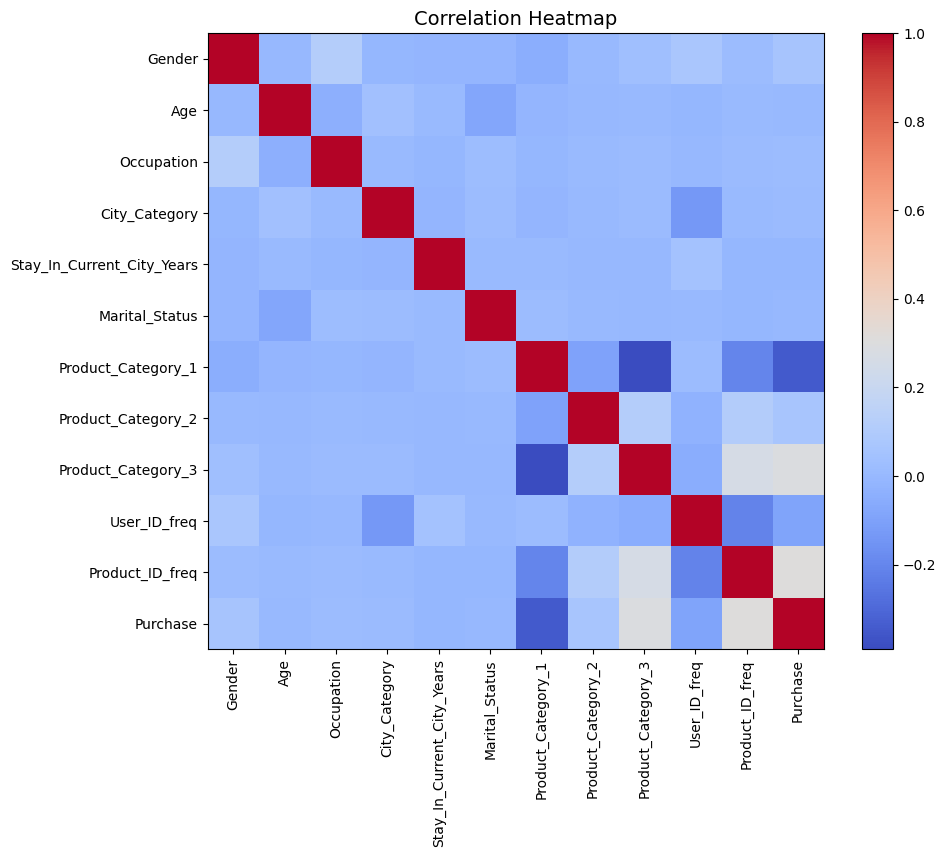

In [17]:
corr = train[features + ["Purchase"]].corr()

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()